# 1) Import necessary packages


In [1]:
# all imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# 2) Load and prepare the dataset
Load the training data into a dataframe named df_train_data (this step is done for you).

Create binary classification problem - rename some class labels (this step done for you).

Create a dataframe of 9 features named X, drop column 9.

Create a data frame of labels named y, select only column 9.

Split the data into a training set and a test set.

In [2]:
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', header=None, sep=' ')
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


In [3]:
df_train_data.loc[df_train_data[9] != 4, 9] = 0
df_train_data.loc[df_train_data[9] == 4, 9] = 1

X = df_train_data.drop([9], axis=1)

y = df_train_data[9]
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))



There are 10875 training samples and 3625 test samples


# 3) Create the model
1. Instantiate a Logistic Regression classifier with a lbfgs solver.
2. Fit the classifier to the data.

In [4]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 4) Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [5]:
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.834


# 5) Dummy Classifier

1.Use the dummy classifier to calculate the accuracy of a purely random chance.

2.Compare this result to the result ofthe logistic regression classifier above. What does this result tell you?

In [6]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.864

The dummy classifier is higher but 3% more than the accuracy. The dummy classifier gives a null accuracy baseline to which you can compare your model's performance. This way we know if our classifier is doing better than just a random guess.

# 6) Confusion Matrix
Print the confusion matrix.

In [7]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[2988  144]
 [ 458   35]]


In [8]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# 7)  Plot a nicer confusion matrix (optional)
Use the plot_confusion_matrix function from above to plot a nicer looking confusion matrix.

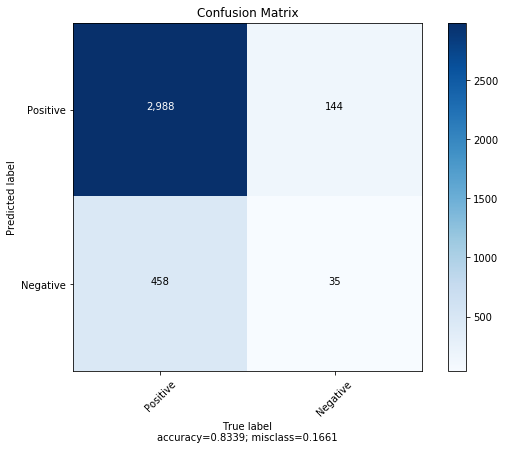

In [9]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

# 8) Calculate Metrics
Print the F1, F beta, precision, recall and accuracy scores.

In [10]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.83
Precision score: 0.20
Recall score: 0.07
F1 score: 0.10
Fbeta score favoring precision: 0.14
FBeta score favoring recall: 0.08


# 9) Print a classification report

In [11]:
report = classification_report(y_test, predictions, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.87      0.95      0.91      3132
    Positive       0.20      0.07      0.10       493

    accuracy                           0.83      3625
   macro avg       0.53      0.51      0.51      3625
weighted avg       0.78      0.83      0.80      3625



# 10) Plot ROC Curve and AUC
Caculate AUC and plot the curve.

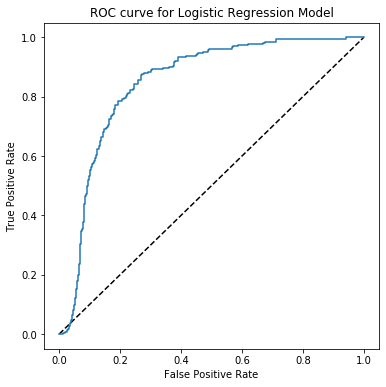

Area under the ROC curve: 0.847


In [12]:
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

# 11) Plot Precision-Recall Curve

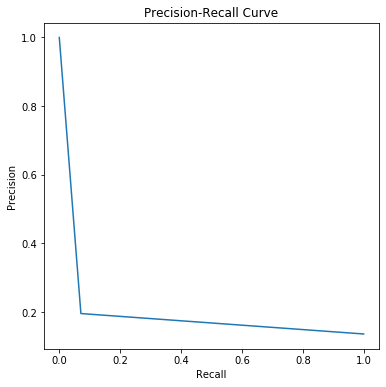

In [13]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5. 

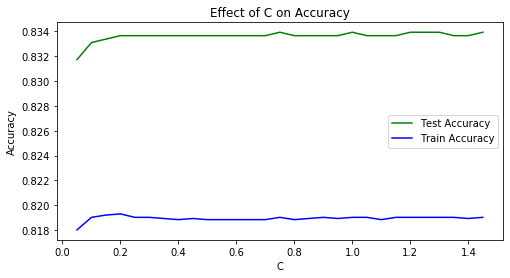

In [14]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()


# 12) Cross Validation
Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.

In [15]:
clf = LogisticRegression(solver='lbfgs', max_iter=10000)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.82215074 0.82490809 0.81609195 0.81278749 0.81876725]
Mean cross validation score: 0.819


# 13) Is this really linear?
Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_7_score = knn.score(X_test, y_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.997


The KNN model's accuracy is more accurate than the Logistic Regression above. This tells us that our data has a lot of feature similarity.

# 14) Random Forest 
Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.

In [17]:
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 1.000
